In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import matplotlib.pyplot as plt


import os, sys
sys.path.append('../code')

from retina2 import *

/home/oalenkin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import warnings
warnings.filterwarnings('ignore')

# reading data

In [3]:
data = pd.read_csv('../data/hits.csv', index_col=0)

# demonstration of z_distance

In [57]:
real = []
exp = []
for event_i in set(data.EventID.values):
    event = data[data.EventID==event_i]
    track1 = event[(event.TrackID==2)&(event.StatNb<3)]
    track_params = get_track_params(track1, 2)
    for i in range(len(track1)):
        start, direction, z0 = ends2params(track1[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i])
        exp.append(z_distance(track_params, z0, start, direction))
        real.append(track1.dist2Wire.values[i])
        
    track2 = event[(event.TrackID==3)&(event.StatNb<3)]
    track_params = get_track_params(track2, 3)
    for i in range(len(track2)):
        start, direction, z0 = ends2params(track2[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i])
        exp.append(z_distance(track_params, z0, start, direction))
        real.append(track2.dist2Wire.values[i])

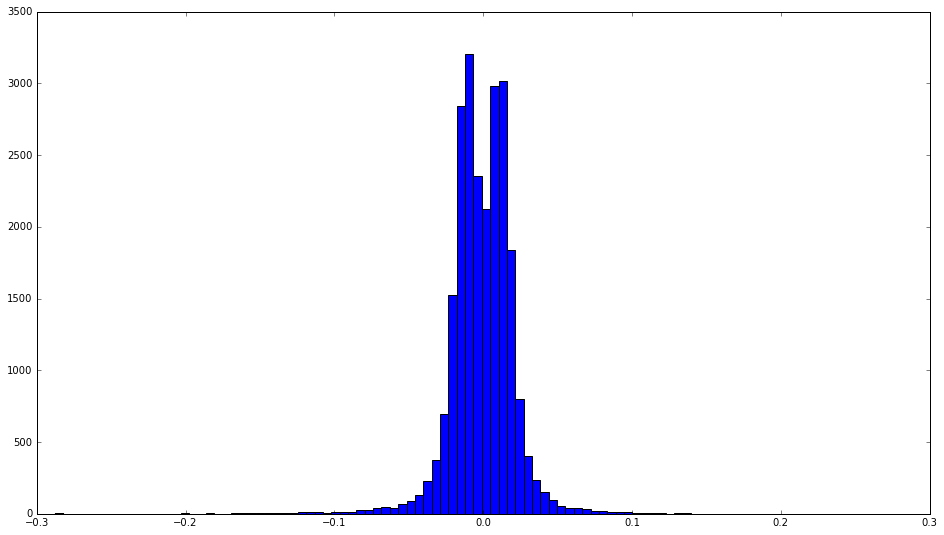

In [58]:
plt.figure(figsize=(16,9))
hist_arr = plt.hist(np.array(real)-np.array(exp), bins=100)

# choose event

In [4]:
event = data[data.EventID==10]
event_before_magnet = event[event.StatNb<3]

# how to use artifitial_retina_response()

In [7]:
artifitial_retina_response(track1, event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 10)

33.412342021876022

In [8]:
test(track1, event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 10)

array(33.41234202187602)

In [9]:
artifitial_retina_response([4.25461110e+01, 1.03470809e-02, 3.03522450e+00, -2.16322858e-04], event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 10)

34.43749994311208

In [10]:
test([4.25461110e+01, 1.03470809e-02, 3.03522450e+00, -2.16322858e-04], event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 10)

array(34.43749994311208)

# 2D projections

In [5]:
size = 20
ms = np.linspace(-0.1, 0.1, size)
y0s = np.linspace(-500, 500, size)
ls = np.linspace(-0.1, 0.1, size)
x0s = np.linspace(-250, 250, size)

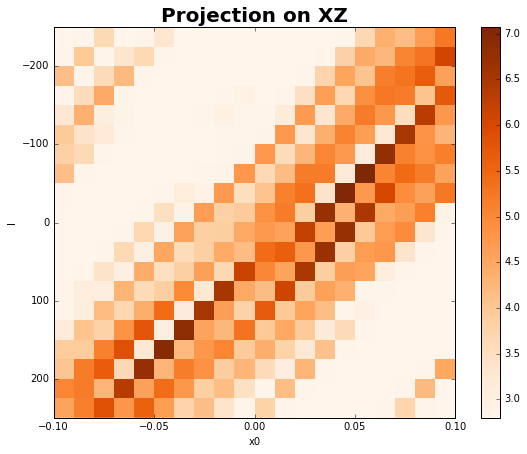

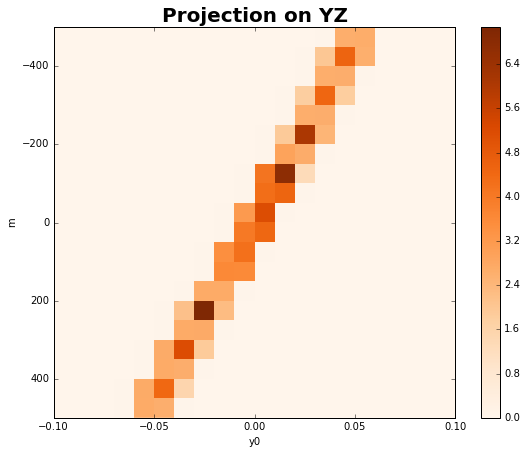

In [6]:
projections = plot_artifitial_retina_response(event_before_magnet, [x0s, ls, y0s, ms], 1)

In [6]:
track1 = get_track_params(event_before_magnet, 2)
track1

[43.76241890491,
 0.011467342483359991,
 6.0624280360975797,
 -0.0020229836340624773]

In [9]:
track2 = get_track_params(event_before_magnet, 3)
track2

[88.338425296568971,
 -0.0092683439167328685,
 -12.820928680230884,
 0.006479333198265858]

# artificial test

choose two pairs of crossed lines drom one track

In [5]:
#art_event = event[(event.index==81)|(event.index==83)|(event.index==91)|(event.index==95)]
art_event = event_before_magnet
#art_event

parameters of track:

In [6]:
track1 = get_track_params(art_event, 2)
track1

[5.5217546222849165,
 -0.014246314964790714,
 -5.2381237523360165,
 0.019672252901979607]

In [7]:
track2 = get_track_params(art_event, 3)
track2

[32.549317727211523,
 0.0086441398478070766,
 -60.051036409505663,
 -0.013726189788967004]

In [8]:
array_of_initial_parameters = []
#for i in np.linspace(-50, 50, 5):
#    for j in np.linspace(-100, 100, 5):
#        array_of_initial_parameters.append([j, 0, i, 0])
#array_of_initial_parameters = np.array(array_of_initial_parameters)

for j in np.linspace(-100, 100, 10):
    array_of_initial_parameters.append([j, 0, 0, 0])
array_of_initial_parameters = np.array(array_of_initial_parameters)

#array_of_initial_parameters = np.array([[0, 0, 0, 0]])

In [9]:
retina = RetinaTrackReconstruction(sigma_from=10., sigma_to=1, eps=0.05)

In [ ]:
%%time
new_dots_array = retina.fit(art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, \
                        array_of_initial_parameters)

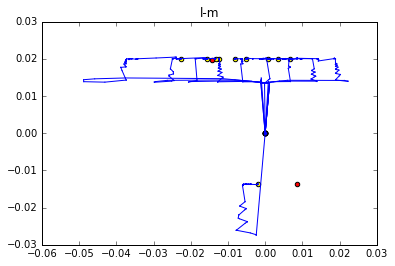

In [11]:
for dots in new_dots_array:
    plt.scatter(dots[0][1], dots[0][3], c='blue')
    plt.scatter(dots[-1][1], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][1], dots[j+1][1]], [dots[j][3], dots[j+1][3]], c='blue')

plt.scatter(track1[1], track1[3], c='red')
plt.scatter(track2[1], track2[3], c='red')
plt.title('l-m')

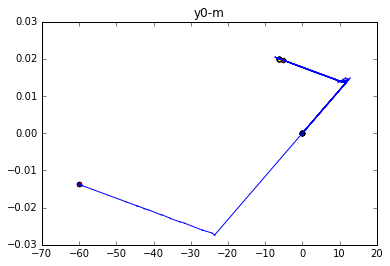

In [12]:
for dots in new_dots_array:
    plt.scatter(dots[0][2], dots[0][3], c='blue')
    plt.scatter(dots[-1][2], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][2], dots[j+1][2]], [dots[j][3], dots[j+1][3]], c='blue')
        
plt.scatter(track1[2], track1[3], c='red')
plt.scatter(track2[2], track2[3], c='red')
plt.title('y0-m')

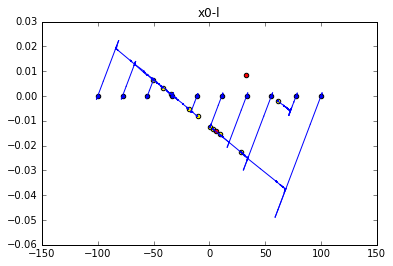

In [13]:
for dots in new_dots_array:
    plt.scatter(dots[0][0], dots[0][1], c='blue')
    plt.scatter(dots[-1][0], dots[-1][1], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][1], dots[j+1][1]], c='blue')
        
plt.scatter(track1[0], track1[1], c='red')
plt.scatter(track2[0], track2[1], c='red')
plt.title('x0-l')

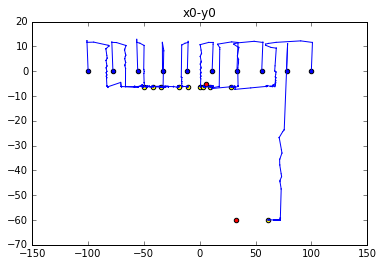

In [14]:
for dots in new_dots_array:
    plt.scatter(dots[0][0], dots[0][2], c='blue')
    plt.scatter(dots[-1][0], dots[-1][2], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][2], dots[j+1][2]], c='blue')
        
plt.scatter(track1[0], track1[2], c='red')
plt.scatter(track2[0], track2[2], c='red')
plt.title('x0-y0')

In [15]:
ind = 7
dots = new_dots_array[ind]

In [16]:
artificial_retina_response(dots[-1], art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 1)

8.2814996395991027

In [17]:
values = [artificial_retina_response(dots[i], art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 1) for i in range(len(dots))]

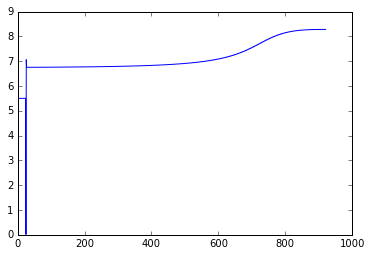

In [18]:
plt.plot(range(len(dots)), values)

In [42]:
artificial_retina_response(track2, art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 1)

18.074980892676983

In [43]:
y_track1 = event_before_magnet[((event_before_magnet.ViewNb==0)|(event_before_magnet.ViewNb==3))&(event_before_magnet.TrackID==2)]
y_track_params1 = np.polyfit(y_track1.Wz1.values, y_track1.Wy1.values, 1)

y_track2 = event_before_magnet[((event_before_magnet.ViewNb==0)|(event_before_magnet.ViewNb==3))&(event_before_magnet.TrackID==3)]
y_track_params2 = np.polyfit(y_track2.Wz1.values, y_track2.Wy1.values, 1)

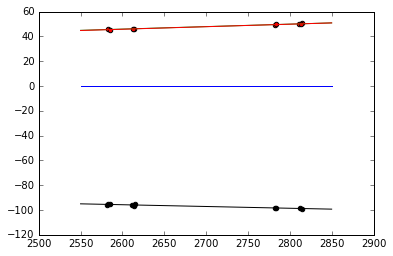

In [44]:
plt.scatter(y_track1.Wz.values, y_track1.Wy1.values, c='red')
plt.scatter(y_track2.Wz.values, y_track2.Wy1.values, c='black')
plt.plot([2550, 2850], [dots[-1][2] + 2550*dots[-1][3], dots[-1][2] + 2850*dots[-1][3]], c='green')
plt.plot([2550, 2850], [dots[0][2] + 2550*dots[0][3], dots[0][2] + 2850*dots[0][3]], c='blue')
plt.plot([2550, 2850], [y_track_params1[1] + 2550*y_track_params1[0], y_track_params1[1] + 2850*y_track_params1[0]], c='red')
plt.plot([2550, 2850], [y_track_params2[1] + 2550*y_track_params2[0], y_track_params2[1] + 2850*y_track_params2[0]], c='black')

(-100, 100)

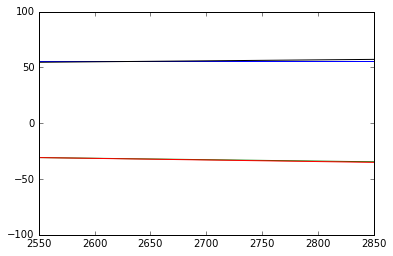

In [45]:
plt.plot([2550, 2850], [dots[-1][0] + 2550*dots[-1][1], dots[-1][0] + 2850*dots[-1][1]], c='green')
plt.plot([2550, 2850], [dots[0][0] + 2550*dots[0][1], dots[0][0] + 2850*dots[0][1]], c='blue')
plt.plot([2550, 2850], [track1[0] + 2550*track1[1], track1[0] + 2850*track1[1]], c='red')
plt.plot([2550, 2850], [track2[0] + 2550*track2[1], track2[0] + 2850*track2[1]], c='black')
plt.ylim([-100, 100])

In [11]:
retina.labels_

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [12]:
retina.tracks_params_

array([[  1.01326120e+01,   2.40062116e-02,   6.65509983e+00,
         -2.26471118e-03],
       [ -6.01136619e+01,   4.54710139e-02,  -1.20723339e+01,
          6.18268971e-03]])

In [13]:
art_event.Label.values

array([ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.])

In [14]:
art_event.Label.values==retina.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [15]:
dots = retina.tracks_params_

In [16]:
for i in range(len(retina.distances1)):
    if art_event.ViewNb.values[i] in {0,3}:
        print art_event.Label.values[i], art_event.ViewNb.values[i], retina.distances1[i]

0.0 0 0.0590594446063
0.0 0 0.36550713616
1.0 3 3.64700078015
0.0 3 0.127000780146
1.0 3 3.21288902923
0.0 3 0.307110970774
0.0 0 0.512001681537
1.0 0 4.91449286384
0.0 3 0.145831266157
0.0 0 0.0778899306174
1.0 0 4.48038111292
1.0 3 4.98243419938
1.0 0 3.14494769369
1.0 0 2.70155062691
0.0 3 0.29756580062
0.0 0 0.375052306314
1.0 3 5.42583126616


In [17]:
for i in range(len(retina.distances1)):
    if art_event.ViewNb.values[i] in {1,2}:
        print art_event.Label.values[i], art_event.ViewNb.values[i], retina.distances1[i]

0.0 1 0.234570962259
1.0 1 3.75457096224
0.0 2 0.0252213294375
1.0 2 3.4947786706
1.0 1 5.95555122663
0.0 1 0.194123269286
1.0 2 2.58183566104
0.0 2 0.0579841435004
1.0 2 2.1422615776
0.0 2 0.38226157763
1.0 2 3.02244177306
0.0 1 0.2194622484
1.0 1 6.38424545818
0.0 1 0.209231983144
0.0 1 0.675551226596
1.0 1 4.20109352098
0.0 2 0.464795412819
0.0 2 0.415024391694
1.0 2 3.93502439169


In [19]:
alpha = 0.97
beta = (10. / alpha**100)**(1/5050)

In [11]:
arr = np.array([1,2,3])

In [16]:
np.dot(arr, arr)

14